In [1]:
%matplotlib notebook
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np

# Modern Physics

- State the special theory of relativity
- Differentiate inertial and non-inertial reference frames
- Compare classical and relativistic physics approaches
- Calculate relativistic masses
- Calculate time dilation
- Calculate length contraction
- Describe the photoelectric effect
- Calculate Compton scattering angles and kinetic energies
- Calculate de Broglie wavelengths
- Relate energy and wavelength for photons
- Understand wave-particle duality 
- Relate wave-particle duality and particle energy/wavelength


## Special Theory of Relativity

Classical physics relies on Newton's laws to descibe motion. Newton's second law says:


\begin{align}
F &=\frac{d\vec{p}}{dt} \\
   &= \frac{dm\vec{v}}{dt}
\end{align}
where
\begin{align}
\vec{F} &= \mbox{the force applied to the object}\\
  \vec{p} &= \mbox{the momentum of the object}\\
  \vec{v} &= \mbox{velocity of the object}\\
  m       &= \mbox{mass of the object}\\
\end{align}

In newtonian physics, the mass of the object ($m$) is constant. 


### Relativistic Mass

In 1905 Einstein showed that mass varies with an object's speed.
\begin{align}
m = \frac{m_o}{\sqrt{1-\frac{v^2}{c^2}}}
\end{align}
where
\begin{align}
  m_o &= \mbox{rest mass of the object}\\
  c &= \mbox{speed of light}\\
    &= 3\times10^{8}\frac{m}{s}
\end{align}

#### Exercise: Think, Pair, Share

If one plotted mass as a function of velocity, what could one expect the plot to look like?

## Principle of Relativity

Lots of things are relative. 
When we talk in physics about relativity, we intend to refer to the _relative_ features of coordinate systems.

Imagine two inertial coordinate systems. $S$ is stationary, while $S'$ is moving away along the x axis with velocity $\vec{v} = v\hat{x}$. The coordinate transformation is, then.

\begin{align}
x' & = x - vt\\
y' &= y\\
z' &= z\\
t' &= t
\end{align}

Substituting these transformations into Newton's laws does not impact their validity. If we consider a force $F_x$ acting on mass $m$, then the 2nd law in the moving system is:



\begin{align}
F_x & = m\frac{d^2x'}{dt'^2}\\
\end{align}

If we transform it to the stationary system, with constant $v$:


\begin{align}
F_x &= m\frac{d^2x'}{dt'^2}\\
&= m\frac{d^2(x-vt)}{d(t)^2}\\
&= m\frac{d^2x}{dt^2}\\
\end{align}


However, Maxwell's equations don't survive the transformation above. Lorentz observed (1904) that a different transformation could preserve Maxwell's equations. We call this the Lorentz transformation:

\begin{align}
x' &= \frac{x - vt}{\sqrt{1-\frac{v^2}{c^2}}}\\
y' &= y\\
z' &= z\\
t' &= \frac{t-\frac{vx}{c^2}}{\sqrt{1-\frac{v^2}{c^2}}}\\
\end{align}


In the Lorentz transformation above, **space and time depend on one another.**

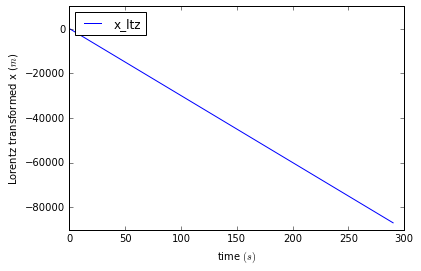

In [2]:
def x_ltz(x, v, t):
    c = 3.0e8
    num = x - v*t
    denom = math.sqrt(1-(v/c)**2)
    return num/denom

def t_ltz(x, v, t):
    c = 3.0e8
    num = t - v*x/c**2
    denom = math.sqrt(1-(v/c)**2)
    return num/denom

x = 1
vel = 3.0e2
time = np.arange(0, 300, 10)
to_plot = np.arange(0.,30.)
for i in range(0, 30):
    to_plot[i] = x_ltz(x, vel, time[i])

plt.plot(time, to_plot, label="x_ltz")
plt.ylabel("Lorentz transformed x ($m$)")
plt.xlabel("time $(s)$")
plt.legend(loc=2)


### Results of the Special Theory of Relativity

What Einstein showed in 1905 was that **all physics in inertial coordinate systems remains unchanged under the Lorentz transformation.** To acheive this, however, one must correct Newton's laws of motion to allow them, too, to remain invariant under this transformation.

Einstein based this on two _postulates_:

- The laws of motion should have the same form in all coordinate systems moving at constant velocities to one another.
- The speed of light in free space, $c$, is the same for all observers and is independent of the relative velocity between the source and observer.

#### Exercise: Think-pair-share

If the first postulate, velocity is kept constant between coordinate systems. What is the name for such coordinate systems?

If the coordinate systems were accelerating with respect to each other, what quality is lost?

### Result: Relativistic Mass

The laws of motion are correct, as stated by Newton, if the mass of the object is a function of the object's speed.

In 1905 Einstein showed that mass varies with an object's speed.

\begin{align}
m = \frac{m_o}{\sqrt{1-\frac{v^2}{c^2}}}
\end{align}
where
\begin{align}
  m_o &= \mbox{rest mass of the object}\\
  c &= \mbox{speed of light}\\
    &= 3\times10^{8}\frac{m}{s}
\end{align}

#### Exercise: Think, Pair, Share

If one plotted mass as a function of velocity, what could one expect the plot to look like?

In [3]:
def m_rel(m_o, v):
    """Returns the relativistic mass of an object
    
    Parameters
    ----------
    m_o : double
        rest mass of the object
    v : double
        velocity of the object
    """
    c = 3.0e8
    m = m_o/math.sqrt((1 - pow(v,2)/pow(c,2)))
    return m

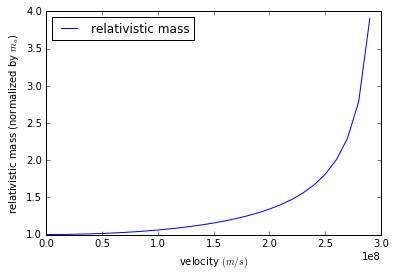

In [4]:
# Plot it
vel = np.arange(0, 3.0e8, 1.0e7)
to_plot = np.arange(0.,30.)
for i in range(0, 30):
    to_plot[i] = m_rel(1, vel[i])

plt.plot(vel, to_plot, label="relativistic mass")
plt.ylabel("relativistic mass (normalized by $m_o$)")
plt.xlabel("velocity $(m/s)$")
plt.legend(loc=2)

### Result: Length Contraction

The length of a moving object, in the direction of its motion, appears smaller to an observer at rest:

\begin{align}
L&=L_o \sqrt{1-\frac{v^2}{c^2}}
\end{align}

where


\begin{align}
L_o &= \mbox{proper length of the object at rest}
\end{align}

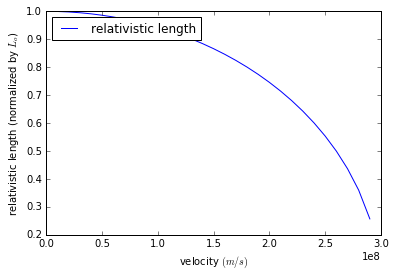

In [5]:
def l_rel(l_o, v):
    """Returns the relativistic length of an object
    
    Parameters
    ----------
    l_o : double
        rest length of the object
    v : double
        velocity of the object
    """
    c = 3.0e8
    length = l_o*math.sqrt((1 - pow(v,2)/pow(c,2)))
    return length

# Plot it
vel = np.arange(0, 3.0e8, 1.0e7)
to_plot = np.arange(0.,30.)
for i in range(0, 30):
    to_plot[i] = l_rel(1, vel[i])

plt.plot(vel, to_plot, label="relativistic length")
plt.ylabel("relativistic length (normalized by $L_o$)")
plt.xlabel("velocity $(m/s)$")
plt.legend(loc=2)

#### Exercise: Think-Pair-Share

When we talk about length in this way, in what direction are we measuring it?

### Result: Time Dilation

The passage of time appears slow in a system moving with respect to a stationary observer.


\begin{align}
t &= \frac{t_o}{\sqrt{1-\frac{v^2}{c^2}}}
\end{align}

where


\begin{align}
t &= \mbox{time required for some physical phenomenon in the moving system}\\
t_o &= \mbox{time required for some physical phenomenon in the stationary system}
\end{align}

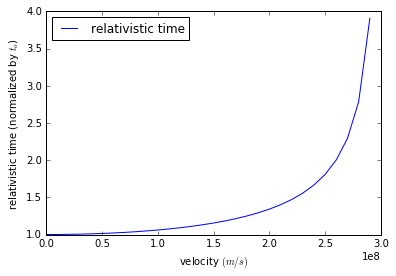

In [6]:
def t_rel(t_o, v):
    """Returns the time required for some physical phenomenon in the moving system
    
    Parameters
    ----------
    t_o : double
        time required for some physical phenomenon in the stationary system
    v : double
        velocity of the moving reference frame
    """
    c = 3.0e8
    time = t_o/math.sqrt((1 - pow(v,2)/pow(c,2)))
    return time

# Plot it
vel = np.arange(0, 3.0e8, 1.0e7)
to_plot = np.arange(0.,30.)
for i in range(0, 30):
    to_plot[i] = t_rel(1, vel[i])

plt.plot(vel, to_plot, label="relativistic time")
plt.ylabel("relativistic time (normalized by $t_o$)")
plt.xlabel("velocity $(m/s)$")
plt.legend(loc=2)

### Exercise: Consider twins

Now, imagine two identical twins, one of whom makes a journey into space in a high-speed rocket and returns home.

Which is older, at the end of the event?

![a-k-huff.jpg](a-k-huff.jpg)

### Result: Equivalence of mass and energy 

The most famous result is that there is an equivalence between mass and energy:

\begin{align}
E_{rest} = m c^2
\end{align}

For particles with mass (such as electrons, protons, neutrons, alpha particles, etc.), the rest mass energy is

\begin{align}
E_{rest} = m_o c^2
\end{align}

where m_o is the mass that is given in reference tables.



### Total Energy

The total energy ($E_{total}$) is the sum of the rest and kinetic energies.  Therefore, for relativistic particles, the total energy is:

\begin{align}
E_{total} &= E_{rest} + E_{kinetic}\\
          &= mc^2\\
          &=\frac{m_oc^2}{\sqrt{1-\frac{v^2}{c^2}}}\\
\end{align}


The above can be used for any particle, though for velocities much slower than the speed of light ($<0.1c$), one can use the simpler classical mechanics expression:

\begin{align}
          E_{total} &= E_{rest} + E_{kinetic}\\
                    &=m_o c^2 + \frac{1}{2}m_ov^2\\
\end{align}

### Exercise: Think-pair-share
Why do photons, such as gamma and X rays, have no rest mass energy ?


## Photon Energy

The total energy of a photon, moving at the speed of light $(c=\lambda\nu)$ is:

\begin{align}
E_{total} &= h\nu\\
  &= \frac{hc}{\lambda}
\end{align}

where

\begin{align}
h &=\mbox{Planck's constant}\\
\nu &= \mbox{frequency of the particle}\\
\lambda &= \mbox{wavelength}
\end{align}



## Kinetic Energy and Momentum

The equation for a particle's momentum is identical both classically and relativistically,

\begin{align}
p=mv.
\end{align}

Classically, we can describe the kinetic energy, $T$, using the momentum.

\begin{align}
T &= \frac{mv^2}{2}\\
  &= \frac{p^2}{2m}\\
  \implies p = \sqrt{2mT}
\end{align}

Relativistically, the relationship between momentum and kinetic energy is, instead:

\begin{align}
p = \frac{1}{c}\sqrt{T^2 + 2Tm_oc^2}.
\end{align}

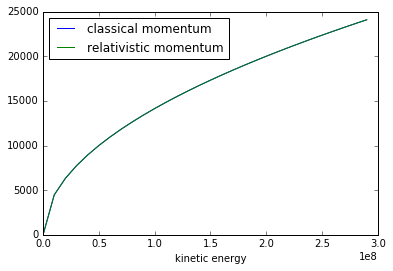

In [23]:
def mom_class(T, m):
    p = pow(2*m*T, 0.5)   
    return p
    
def mom_rel(T, m_o):
    c = 3.0e8
    p = (1/c)*pow((T**2 + 2*T*m_o*c**2), 0.5)
    return p


# Plot it
kinetic = np.arange(0, 3.0e8, 1.0e7)
to_plot_rel = np.arange(0.,30.)
to_plot_class = np.arange(0, 30.)
m = 1
for i in range(0, 30):
    to_plot_rel[i] = mom_rel(kinetic[i], m)
    to_plot_class[i] = mom_class(kinetic[i], m)
    
plt.plot(kinetic, to_plot_class, label="classical momentum")
plt.plot(kinetic, to_plot_rel, label="relativistic momentum")
plt.xlabel("kinetic energy")
plt.legend(loc=2)

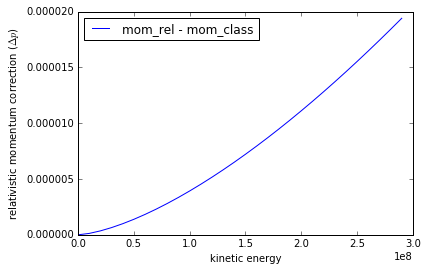

In [24]:
to_plot_diff = to_plot_rel - to_plot_class
plt.plot(kinetic, to_plot_diff, label="mom_rel - mom_class")
plt.ylabel("relativistic momentum correction ($\Delta p $)")
plt.xlabel("kinetic energy")
plt.legend(loc=2)

## The photoelectric effect



- **1887** Hertz showed that when metal surfaces were irradiated with light "electricity" was emitted
- **1898** J.J. Thompson showed these were electrons ("photoelectrons")

The classical theory explaining this was insufficient to describe the experimental results. Specifically, it failed to explain the following phenomena:

- For each metal there is a minimum light frequency $\nu$ below which no photoelectrons are emitted
- There is no time lag between the irradiation and emission
- The intensity of the light only impacts the _rate_ of photoelectron emission
- The photoelectron kinetic energy only depends on frequency of light (not intensity)

- **1905** Einstein, in his big year, suggested a new model. 

<a title="By Wolfmankurd (en:Inkscape) [GFDL (http://www.gnu.org/copyleft/fdl.html) or CC-BY-SA-3.0 (http://creativecommons.org/licenses/by-sa/3.0/)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Photoelectric_effect.svg"><img width="128" alt="Photoelectric effect" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Photoelectric_effect.svg/128px-Photoelectric_effect.svg.png"></a>


He postulated that light is made of _photons_ that have energy:

\begin{align}
E&=h\nu\\
 &=\mbox{energy of a photon}\\
\mbox{where }&\\
h&=\mbox{Plank's constant}\\
 &=6.62\times 10^{-34} [J\cdot s]\\
\nu&=\mbox{photon frequency}
\end{align}

Additionally, he suggested that photons act as a whole -- never partially absorbed or emitted by an atom. Thus, the maximum kinetic energy of an electron would be:

\begin{align}
E&=h\nu-A\\
 &=\mbox{maximum kinetic energy of a photoelectron}\\
 \mbox{where }&\\
A &= \mbox{"work function"}\\
&=\mbox{amount of energy required to free the electron from the metal}
\end{align}

## Exercise: Photoelectric effect (from Shultis & Faw)

What is the maximum wavelength of light required to liberate photoelectrons from a metallic surface with a awork function of 2.35ev (energy neeced to free a valence electron)?


The maximum wavelength has the minumum frequency. So, find the minimum frequency by assuming no energy is lost to the electron in the form of kinetic energy:

\begin{align}
\nu_{min} &= \frac{A}{h}\\
          &=\frac{2.35ev}{4.136\times10^{-15}eV}\\
          &= 5.68\times 10^{14} \frac{1}{s}\\
\implies \lambda_{max} &= \frac{c}{\nu_{min}}\\
            &=\frac{2.998\times10^{8}\frac{m}{s}}{5.68\times 10^{14}\frac{1}{s}}\\
             &=\boxed{5.28\times10^{-7}m}
\end{align}

## Compton Scattering

- **1922** Compton noticed that x-rays scattered from electrons had a change in wavelength $\Delta\lambda = \lambda' - \lambda$ proportional to $(1-\cos{\theta_s})$

<a title="JabberWok [GFDL (http://www.gnu.org/copyleft/fdl.html) or CC-BY-SA-3.0 (http://creativecommons.org/licenses/by-sa/3.0/)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Compton-scattering.svg"><img width="128" alt="Compton-scattering" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Compton-scattering.svg/128px-Compton-scattering.svg.png"></a>




To explain this, we must treat x-rays as particles with a linear momentum $p=\frac{h}{\lambda}$ and energy $E=h\nu=pc$.

In an x-ray scattering  interaction, both momentum and energy must be conserved. To conserve momentum

\begin{align}
\vec{p_\lambda} = \vec{p_{\lambda'}}+\vec{p_e}
\end{align}

## Exercise: Conservation of Momentum

Draw a triangle representing the relationship between $\vec{p_\lambda}$,$\vec{p_{\lambda'}}$, and $\vec{p_e}$. Use $\phi_e$ and $\theta_s$ to represent the electron-photon incident angle and the scattering angle.


From the law of cosines:

\begin{align}
p_e^2 &= p_\lambda^2 + p_{\lambda'}^2 - 2p_\lambda p_{\lambda'}\cos{\theta_s}
\end{align}


From conservation of energy:
\begin{align}
p_\lambda c+m_ec^2 &=  p_{\lambda'}c + mc^2\\
\mbox{where }&\\
m_e&=\mbox{rest mass of the electron}\\
m &= \mbox{relativistic electron mass after scattering}
\end{align}

Combining these gives:

\begin{align}
\lambda' - \lambda &= \frac{h}{m_ec}(1-\cos{\theta_s})\\
\implies \frac{1}{E'} - \frac{1}{E} &= \frac{1}{m_ec^2}(1-\cos{\theta_s})
\end{align}

## Exercise: Recoil energy

What is the recoil kinetic energy of the electron?

First, we can find the energy of the scattered photon:

\begin{align}
E'  &= \left[\frac{1}{E} + \frac{1}{m_ec^2}(1-\cos{\theta_s})\right]^{-1}\\
  &= \left[\frac{1}{3MeV} + \frac{1}{0.511MeV}\left(1-\cos{\frac{\pi}{4}}\right)\right]^{-1}
  &= 1.10MeV
\end{align}

The energy lost by the scattered photon is balanced by kinetic energy of the electron, $ T_e = E-E' = 3- 1.10 = 1.90MeV.$

## Electromagnetic Radiation : Wave-Particle duality

### Photon properties
Photons must always be treated relativistically since they travel at the speed of light $c$.

#### What's $\nu$?

\begin{align}
c = \lambda \nu\\
\implies \nu = \frac{c}{\lambda}
\end{align}

The momentum of the photon is of course:

\begin{align}
p&=\frac{E}{c}\\
&= \frac{h\nu}{c}\\
&= \frac{h}{\lambda}.
\end{align}

And its relativistic mass comes from the equivalence of mass and energy:

\begin{align}
mc^2 &= E = h\nu\\
\implies m&=\frac{h\nu}{c^2}
\end{align}


## de Broglie wavelength

- **1924** de Broglie's PhD thesis proposed that electrons have wave-like and particle-like properties, just like photons.

The dominance of classical vs relativistic behavior is related to the object's energy and mass. The de Broglie wavelength can be used to differentiate that threshold.

By rearranging the momentum equation stated for photons, a relationship between $\lambda$ and $p$ for the electron can be found:

\begin{align}
\lambda &={\frac {h}{p}}\\
 &= \frac{h}{\sqrt{T^2 + 2Tm_oc^2}}
\end{align}

The relationship is now known to hold for all types of matter: **all matter exhibits properties of both particles and waves.**

